<a href="https://colab.research.google.com/github/nike-2001/AI-Hands-on/blob/main/Titanic_Survival_Prediction_using_k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

*italicized text*# Data Collection

In [ ]:
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_titanic/train.csv
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_titanic/test.csv

--2021-04-10 12:11:02--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_titanic/train.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.62.23
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|52.219.62.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘train.csv.4’

train.csv.4         100%[===================>]  59.76K   142KB/s    in 0.4s    

2021-04-10 12:11:04 (142 KB/s) - ‘train.csv.4’ saved [61194/61194]

--2021-04-10 12:11:04--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_titanic/test.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Understanding Data

In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


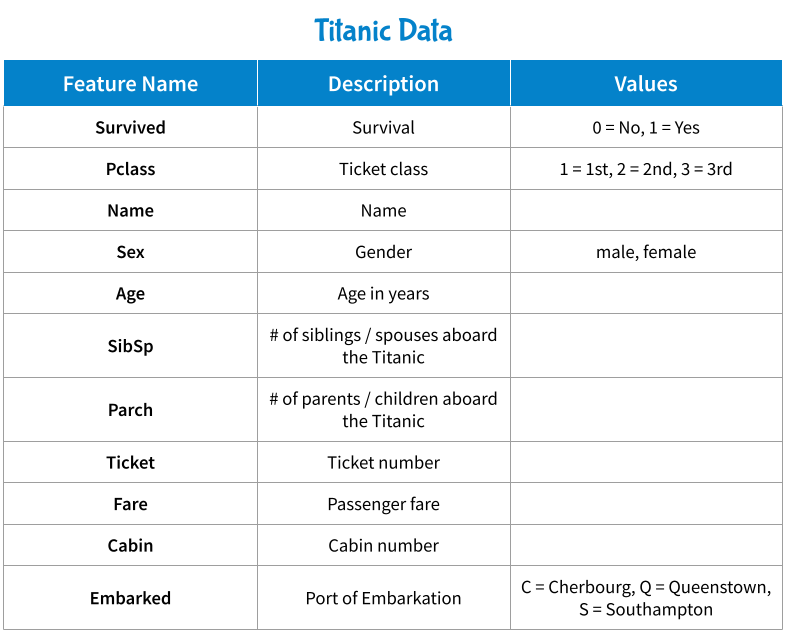

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train_df.shape

(891, 12)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Preprocessing

## Checking for missing values

In [ ]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Dropping columns

The '**Cabin**' feature has a lot of missing values. 
It seems like the features 'Cabin', 'PassengerId', 'Name' and 'Ticket' probably won't help us in understanding whether a person survives or not. So, these columns can be dropped from the dataset.

**ToDo**
* Drop the 'Cabin', 'PassengerId', 'Name' and 'Ticket' columns from both the train and test data.

In [ ]:
# ADD YOUR CODE HERE
train_df = train_df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis = 1)
test_df = test_df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis = 1)

In [ ]:
print(train_df.isna().sum())
print(test_df.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


## Replacing missing values in numerical data with **Mean**

The '**Age**' feature has a lot of missing values. However, since the age of a passenger might be highly correlated with whether a passenger survives or not, dropping the 'Age' column could reduce the performance of the model significantly.

**ToDo**
* Compute the mean of the **Age** values in the **train** data.
* Replace the missing values of the 'Age' feature in the **train** data with the calculated mean from the previous step.
* The preprocessing techniques and parameters used on the train data should be used as it is on the test data.
* So, replace the missing values of the 'Age' feature in the **test** data using the same calculated mean(from the first step).

**HINTS**: 
  * You can use `df['column_name'].mean()` to calculate the mean.
  * You can use `df['column_name'].fillna()` to fill the missing values.


In [ ]:
train_df = train_df.fillna(value = {'Age': train_df['Age'].mean()})
test_df = test_df.fillna(value = {'Age': train_df['Age'].mean()})

In [ ]:
train_df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
print(train_df.isna().sum())
print(test_df.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64


**ToDo**
The test data has missing values in the **Fare** feature. 
* Compute the mean of the **Fare** values in the **train** data.
* Replace the missing values of the **Fare** feature in the **test** data with the calculated mean from the previous step.

**HINTS**: 
  * You can use `df['column_name'].mean()` to calculate the mean.
  * You can use `df['column_name'].fillna()` to fill the missing values.


In [ ]:
# ADD YOUR CODE HERE
test_df = test_df.fillna(value = {'Fare': train_df['Fare'].mean()})

In [ ]:
print(train_df.isna().sum())
print(test_df.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


## Replacing non-numerical(categorical) missing values with **Mode**

The '**Embarked**' feature has 2 missing values.<br>
It's a non-numerical(categorical) feature. So, we can replace it with the most frequent value. **Mode** gives us the most frequent value.

**ToDo**

* Compute the mode value of the **Embarked** feature.
* Replace the missing values in the **Embarked** feature in the **train** data with the calculated mode from the previous step.
* Since there aren't any missing Embarked values in test data, we don't have to perform this step on the test data.

**HINTS**: 
  * You can use `df['column_name'].mode()[0]` to get the mode value.
  * You can use `df['column_name'].fillna()` to fill the missing values.


In [ ]:
# ADD YOUR CODE HERE
train_df = train_df.fillna(value = {'Embarked': train_df['Embarked'].mode()[0]})


In [ ]:
print(train_df.isna().sum())
print(test_df.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


## Converting all the data to Numerical data

'Sex' and 'Embarked' are non-numerical (categorical) columns.

In [ ]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

One-hot encoding is one of the methods used to convert non-numerical features like 'Embarked' and 'Sex' to numerical.<br>
Apply One-hot encoding on the train and test datasets using `pd.get_dummies(df)`. 

In [ ]:
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


* Note that executing the code given above produced five new columns:
     * 'Embarked_C', 'Embarked_Q', and 'Embarked_S' in place of the 'Embarked' column
     * 'Sex_male' and 'Sex_female' in place of the 'Sex' column 
* All of these columns contain binary values (0 or 1).
* *Example*: If the value in the 'Sex' column is 'male', then it will be replaced by the two columns 'Sex_male' with 1 and 'Sex_female' with 0.

##**ToDo**
## Separate target feature **Survived** in the train data

**HINT**: You can use `df.pop('column_name')` to separate a column.

In [ ]:
# ADD YOUR CODE HERE
y = train_df.pop('Survived')


In [ ]:
train_df

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


## Feature Scaling

k-NN gives better performance when all the features are with the same scale.<br>We perform **Feature Scaling** to bring all the features to the same scale.<br>We are using `sklearn.preprocessing.MinMaxScaler()` to perform Feature Scaling here.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df = scaler.fit_transform(train_df)
test_df = scaler.transform(test_df)

# Training

**ToDo**
* Find the best hyperparameters **k**(nearest neighbours) and **p** (power metric in minkowski's distance) using **GridSearchCV** and **KNeighborsClassifier**

In [ ]:
# ADD YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = {
    'n_neighbors': [10, 15],
    'p': [1,2]
}

clf = GridSearchCV(KNeighborsClassifier(), hyperparameters, scoring='accuracy', n_jobs=2, refit=True, verbose=1) 
clf.fit(train_df, y)
print(clf.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


{'n_neighbors': 10, 'p': 1}


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    1.5s finished


# Predicting for Test data

**ToDo**

Predict the target values for Test data(`predicted_test_Y`) using the best model(model with the best hyperparameters fit on the entire train data).

In [ ]:
# ADD YOUR CODE HERE
best_model = clf.best_estimator_
predicted_test_Y = best_model.predict(test_df)
predicted_test_Y

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Download the `titanic_knn_submission.csv` file and upload [here](https://www.kaggle.com/c/titanic/submit).

In [ ]:
test_X_df = pd.read_csv('test.csv')

predicted_test_Y_df = pd.DataFrame()
predicted_test_Y_df['PassengerId'] = test_X_df['PassengerId']
predicted_test_Y_df['Survived'] = predicted_test_Y

predicted_test_Y_df.to_csv("titanic_knn_submission.csv", index = False, header = True) 

After submitting your project in Kaggle, submit your kaggle profile link in the form present in the next sub-topic ‘Project Submission Form’.
Sample profile link format: https://www.kaggle.com/your-user-name/
